<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/KFold_Cross_Validation_with_Iris_Dataset_Sklearn_Builtin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = load_iris()
X = data.data
y = data.target

In [2]:
model = LogisticRegression(max_iter=200)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-Validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Accuracy: 0.9733333333333334
Standard Deviation: 0.024944382578492935


In [3]:
# Fit on full data for additional evaluation
model.fit(X, y)
y_pred = model.predict(X)

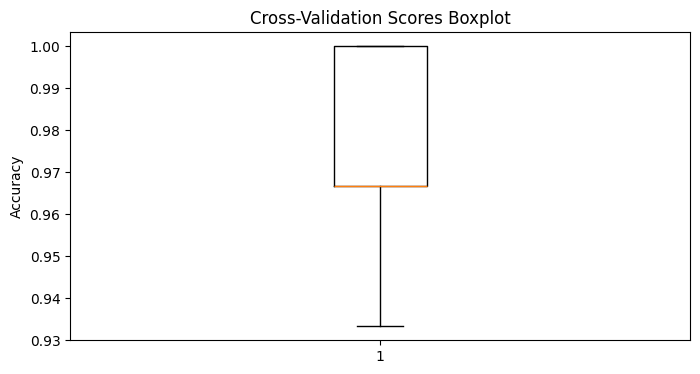

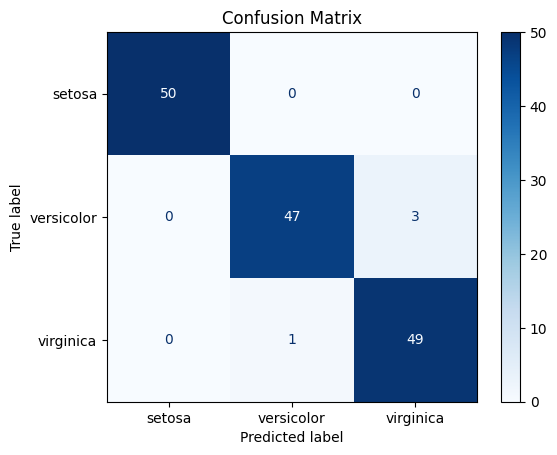

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
Valu

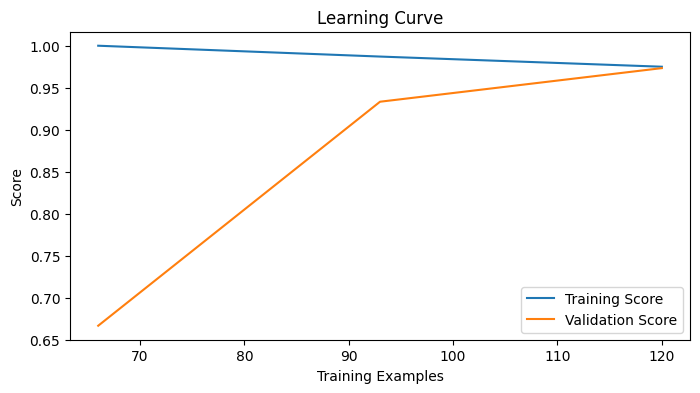

In [4]:
# Plot 1: Boxplot of CV Scores
plt.figure(figsize=(8, 4))
plt.boxplot(scores)
plt.title('Cross-Validation Scores Boxplot')
plt.ylabel('Accuracy')
plt.show()

# Plot 2: Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot 3: Learning Curve
train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()